<a href="https://colab.research.google.com/github/twinklegithub/HDS5210_InClass/blob/master/week13/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [13]:
import pandas as pd

# To Load the dataset
file_path = '/content/Employee.csv'
data = pd.read_csv(file_path)

# To show the dataset's shape
num_rows, num_columns = data.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 4653 rows and 9 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [14]:
# Count unique values per column
unique_counts = data.nunique()

# Identify the most diverse column, removing any unique identifiers that may be present.
most_diverse = unique_counts.idxmax()
next_most_diverse = unique_counts.nlargest(2).index[-1] if unique_counts.shape[0] > 1 else None

# Display results
print("Unique values per column:")
print(unique_counts)
print(f"The column with the greatest number of unique values: {most_diverse}")
if next_most_diverse:
    print(f"The next most diverse column: {next_most_diverse}")

Unique values per column:
Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64
The column with the greatest number of unique values: Age
The next most diverse column: ExperienceInCurrentDomain


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [15]:
 #Find redundant columns (all values are the same)
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Display results
if redundant_columns:
    print("Columns where all rows have the same value:")
    print(redundant_columns)
else:
    print("No redundant columns found.")

No redundant columns found.


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

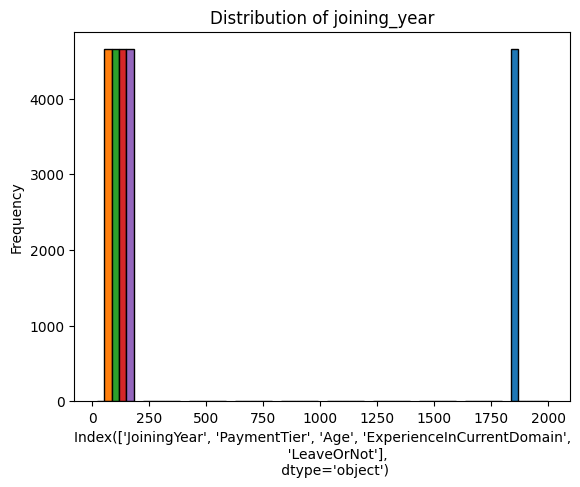

In [20]:
import matplotlib.pyplot as plt

joining_year = data.select_dtypes(include='number').columns
if joining_year.any():
    column_to_plot = joining_year[0]  # Choose the first numeric column
    plt.hist(data[joining_year].dropna(), bins=10, edgecolor='black')
    plt.title(f"Distribution of joining_year")
    plt.xlabel(joining_year)
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No numeric columns found for plotting.")

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [21]:
# Correlation matrix for numeric columns
if joining_year.any():
    correlation_matrix = data[joining_year].corr()
    print("Correlation matrix for joining_year:")
    print(correlation_matrix)
else:
    print("No numeric columns available for correlation analysis.")

Correlation matrix for joining_year:
                           JoiningYear  PaymentTier       Age  \
JoiningYear                   1.000000    -0.096078  0.013165   
PaymentTier                  -0.096078     1.000000  0.007631   
Age                           0.013165     0.007631  1.000000   
ExperienceInCurrentDomain    -0.036525     0.018314 -0.134643   
LeaveOrNot                    0.181705    -0.197638 -0.051126   

                           ExperienceInCurrentDomain  LeaveOrNot  
JoiningYear                                -0.036525    0.181705  
PaymentTier                                 0.018314   -0.197638  
Age                                        -0.134643   -0.051126  
ExperienceInCurrentDomain                   1.000000   -0.030504  
LeaveOrNot                                 -0.030504    1.000000  




---



## Submitting Your Work

Submit your work as usual.